In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from glob import glob
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import fnmatch
import tensorflow as tf
from time import sleep
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten,BatchNormalization,MaxPooling2D,Activation
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as k
import matplotlib.image as mpimg
import os
from tensorflow.keras import layers 
from tensorflow.keras import Model

from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
plt.rcParams['figure.figsize'] = (12,7)

In [36]:
print(os.listdir("final_dataset1"))

['Falciparum', 'Uninfected', 'Vivax']


In [63]:
# Setting paths and showing the number of images
falciparum = os.listdir("final_dataset1/Falciparum")
falciparum_path = "final_dataset1/Falciparum"
print("Length of falciparum data = ", len(falciparum), 'images')
vivax = os.listdir("final_dataset1/Vivax")
vivax_path = "final_dataset1/Vivax"
print("Length of vivax data = ", len(vivax), 'images')
uninfected = os.listdir("final_dataset1/Uninfected")
uninfected_path = "final_dataset1/Uninfected"
print("Length of ovale data = ", len(uninfected), 'images')


Length of falciparum data =  965 images
Length of vivax data =  965 images
Length of ovale data =  965 images


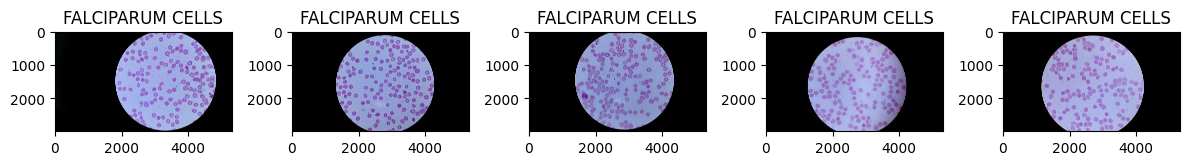

In [38]:

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(cv2.imread(falciparum_path + '/' + falciparum[i]))
    plt.title('FALCIPARUM CELLS')
    plt.tight_layout()
plt.show()

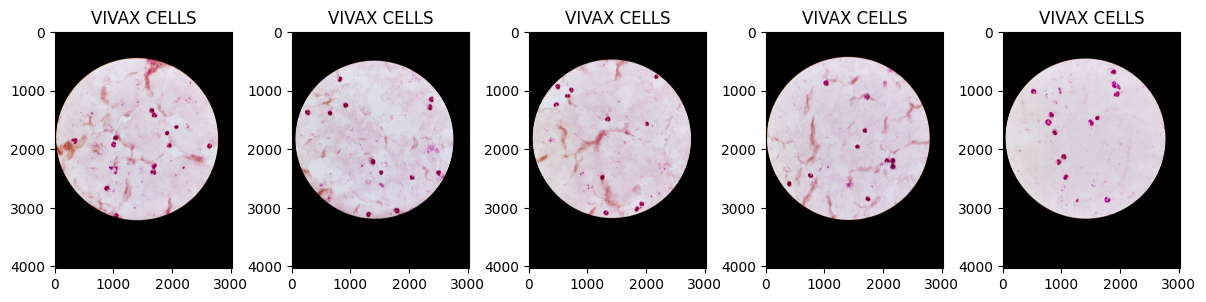

In [29]:
for i in range(5):
    image_path = vivax_path + '/' + vivax[i]
    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to read image at path: {image_path}")
        continue
    
    plt.subplot(1, 5, i+1)
    plt.imshow(image)
    plt.title('VIVAX CELLS')
    plt.tight_layout()

plt.show()

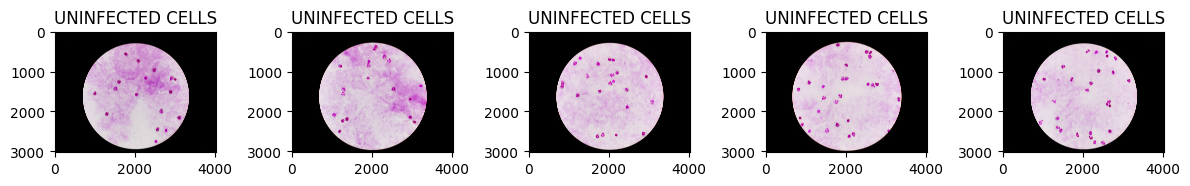

In [30]:

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(cv2.imread(uninfected_path + '/' + uninfected[i]))
    plt.title('UNINFECTED CELLS')
    plt.tight_layout()
plt.show()

In [2]:
img_shape = (130, 130, 3)
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/225,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest',
                              validation_split=0.2)

In [4]:
train = image_gen.flow_from_directory('final_dataset1',
                                     target_size=img_shape[:2],
                                     color_mode='rgb',
                                     batch_size=32,
                                     class_mode='categorical',  # Change class_mode to 'categorical'
                                     subset='training',
                                     shuffle=True)

validation = image_gen.flow_from_directory('final_dataset1',
                                          target_size=img_shape[:2],
                                          color_mode='rgb',
                                          batch_size=32,
                                          class_mode='categorical',  # Change class_mode to 'categorical'
                                          subset='validation',
                                          shuffle=False)


Found 2316 images belonging to 3 classes.
Found 579 images belonging to 3 classes.


In [3]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

# Load the InceptionV3 model without the top classification layers
base_model = InceptionV3(input_shape=(130, 130, 3), include_top=False, weights='imagenet')

# Add your custom classification layers on top of the base InceptionV3 model
x = GlobalAveragePooling2D()(base_model.output)
# Add a Dense output layer with the appropriate number of neurons for the number of classes in your problem
num_classes = 3  # Change this according to your problem
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with RMSprop optimizer and categorical crossentropy loss
# Use learning_rate instead of lr
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
inc_history = model.fit_generator(train, validation_data = validation, steps_per_epoch = 70, epochs = 10)

In [3]:
# For model accuracy
if 'accuracy' in inc_history.history:
    ax.plot(inc_history.history['accuracy'], color='red')
if 'val_accuracy' in inc_history.history:
    ax.plot(inc_history.history['val_accuracy'], color='green')

# For model loss
if 'loss' in inc_history.history:
    ax.plot(inc_history.history['loss'], color='red')
if 'val_loss' in inc_history.history:
    ax.plot(inc_history.history['val_loss'], color='green')


NameError: name 'inc_history' is not defined

C:\Users\avisi\AppData\Local\Temp\ipykernel_15612\2091849686.py:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


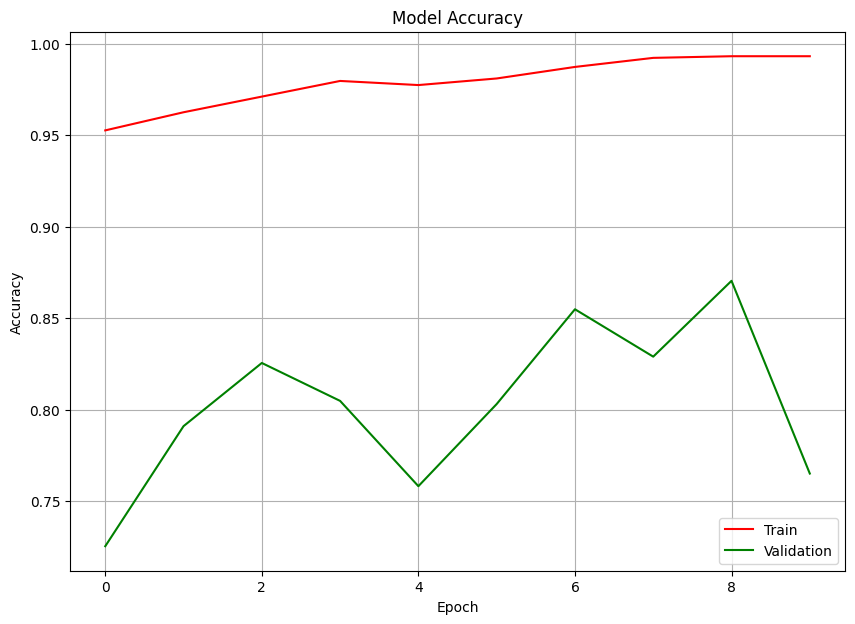

C:\Users\avisi\AppData\Local\Temp\ipykernel_15612\2091849686.py:22: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


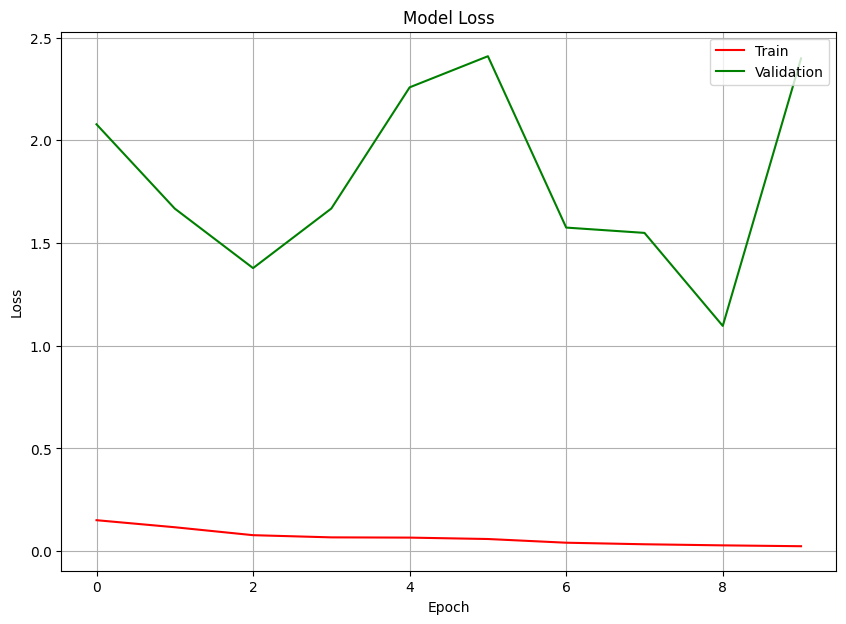

In [50]:
import matplotlib.pyplot as plt

# Plot model accuracy
plt.figure(figsize=(10,7))
plt.plot(inc_history.history['accuracy'], color='red')
plt.plot(inc_history.history['val_accuracy'], color='green')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.grid(b=True)
plt.show()

# Plot model loss
plt.figure(figsize=(10,7))
plt.plot(inc_history.history['loss'], color='red')
plt.plot(inc_history.history['val_loss'], color='green')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(b=True)
plt.show()


# WITH PRE-PROCESSING

In [4]:
train = image_gen.flow_from_directory('preprocessed_dataset',
                                     target_size=img_shape[:2],
                                     color_mode='rgb',
                                     batch_size=32,
                                     class_mode='categorical',  # Change class_mode to 'categorical'
                                     subset='training',
                                     shuffle=True)

validation = image_gen.flow_from_directory('preprocessed_dataset',
                                          target_size=img_shape[:2],
                                          color_mode='rgb',
                                          batch_size=32,
                                          class_mode='categorical',  # Change class_mode to 'categorical'
                                          subset='validation',
                                          shuffle=False)


Found 2316 images belonging to 3 classes.
Found 579 images belonging to 3 classes.


In [5]:
inc_history = model.fit_generator(train, validation_data = validation, steps_per_epoch = 70, epochs = 10)

C:\Users\avisi\AppData\Local\Temp\ipykernel_9840\3388570592.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  inc_history = model.fit_generator(train, validation_data = validation, steps_per_epoch = 70, epochs = 10)


Epoch 1/10
70/70 [==============================] - 736s 10s/step - loss: 0.1452 - accuracy: 0.9523 - val_loss: 0.0766 - val_accuracy: 0.9706
Epoch 2/10
70/70 [==============================] - 1562s 23s/step - loss: 0.0223 - accuracy: 0.9905 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 3/10
70/70 [==============================] - 700s 10s/step - loss: 0.0284 - accuracy: 0.9914 - val_loss: 0.0042 - val_accuracy: 0.9983
Epoch 4/10
70/70 [==============================] - 1087s 6s/step - loss: 0.0116 - accuracy: 0.9959 - val_loss: 0.0269 - val_accuracy: 0.9896
Epoch 5/10
70/70 [==============================] - 384s 5s/step - loss: 0.0161 - accuracy: 0.9968 - val_loss: 0.0167 - val_accuracy: 0.9931
Epoch 6/10
70/70 [==============================] - 388s 6s/step - loss: 0.0050 - accuracy: 0.9973 - val_loss: 0.0071 - val_accuracy: 0.9983
Epoch 7/10
70/70 [==============================] - 385s 6s/step - loss: 0.0030 - accuracy: 0.9995 - val_loss: 0.0110 - val_accuracy: 0.9965
Epoch 8/

C:\Users\avisi\AppData\Local\Temp\ipykernel_9840\2091849686.py:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


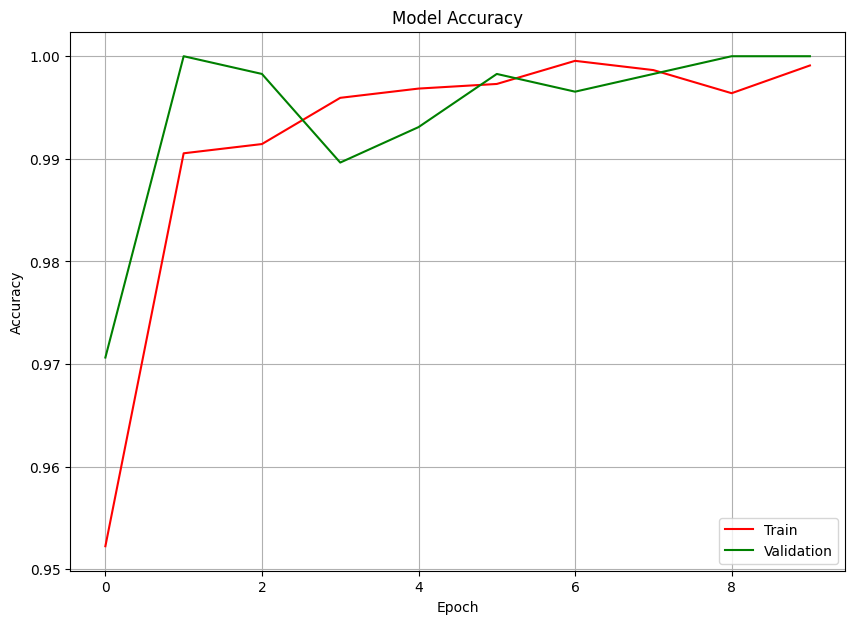

C:\Users\avisi\AppData\Local\Temp\ipykernel_9840\2091849686.py:22: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


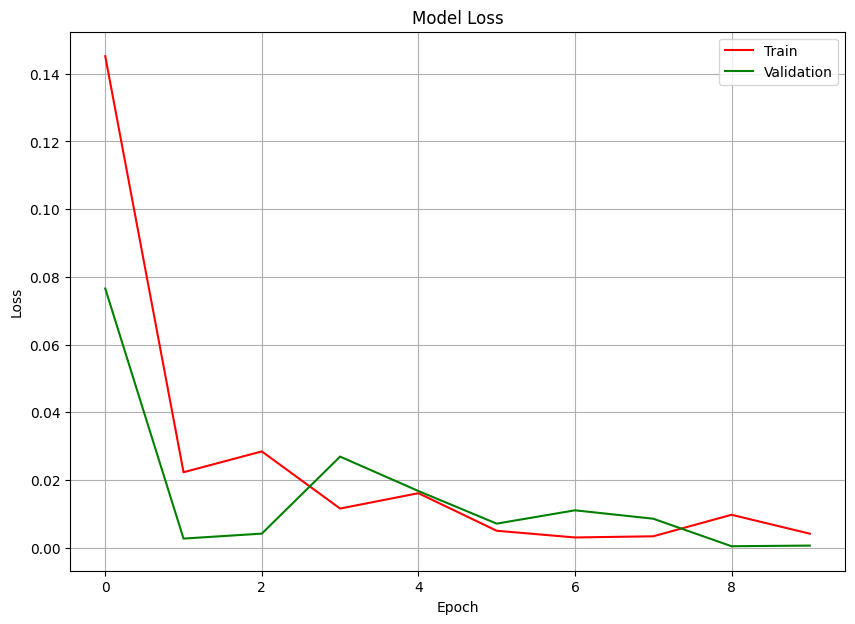

In [6]:
import matplotlib.pyplot as plt

# Plot model accuracy
plt.figure(figsize=(10,7))
plt.plot(inc_history.history['accuracy'], color='red')
plt.plot(inc_history.history['val_accuracy'], color='green')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.grid(b=True)
plt.show()

# Plot model loss
plt.figure(figsize=(10,7))
plt.plot(inc_history.history['loss'], color='red')
plt.plot(inc_history.history['val_loss'], color='green')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(b=True)
plt.show()
